# Importando Bibliotecas

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [76]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

In [77]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(len(dataframe.iloc[0,0])):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

# Importando Dados

In [78]:
past = 'C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/'

In [79]:
previsoes_np = {}
previsoes = []
for index in range(60):
    with open(past+f'Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['demandas'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)
previsoes_np.head()


,demandas
0,"[89.44865417480469, 89.7499771118164, 90.17575..."
1,"[89.34261322021484, 89.48824310302734, 89.5622..."
2,"[88.97976684570312, 88.89714050292969, 89.1076..."
3,"[89.639892578125, 89.3507308959961, 90.0578002..."
4,"[89.48078155517578, 89.7647476196289, 90.19262..."


In [80]:
len(previsoes_np.iloc[1,0])

17

In [81]:
previsoes_ar = {}
previsoes = []
for index in range(60):
    with open(past+f'Prev_ari/Previsao_ari{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_ar['demandas'] = previsoes
previsoes_ar = pd.DataFrame(previsoes_ar)

In [82]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
demandas_aux = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',parse_dates=['date'],date_parser=dateparse)
demandas = {}
  

filtro_string = [f'(date>="201{i}/01/01" and date<"201{i}/05/01")' for i in range(5,9)]
filtro = filtro_string[0]+'or'+filtro_string[1]+'or'+filtro_string[2]+'or'+filtro_string[3]

df_demandas = demandas_aux.copy()
demandas_aux.query(filtro,inplace=True)

demandas = {}
demandas_quadrimestre = []
for i in range(5,9): 
    demandas_quadrimestre.append(list(demandas_aux.query(f'date>="201{i}/01/01" and date<"201{i+1}/01/01"')['demandas']))

demandas['demandas'] = demandas_quadrimestre
demandas = pd.DataFrame(demandas)
demandas.iloc[0,0] = demandas.iloc[0,0][:17]

C:\Users\marcio\AppData\Local\Temp\ipykernel_10580\2280214207.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')


In [83]:
with open('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_arima.txt', "r") as arquivo:
	test_ar = [float(demanda) for demanda in arquivo.read().split(',')]

with open('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_pro.txt', "r") as arquivo:
	test_np = [float(demanda) for demanda in arquivo.read().split(',')]


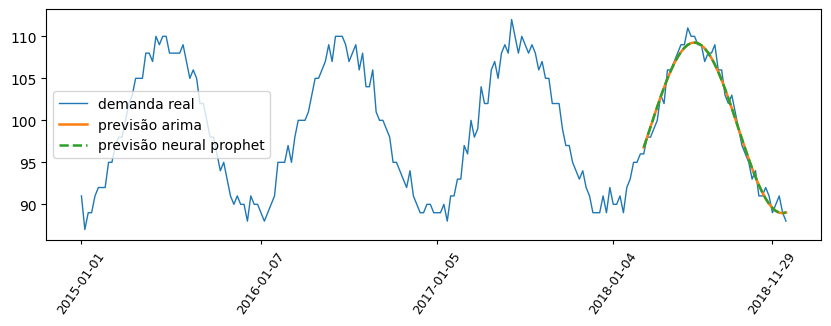

In [84]:
fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,1,1)

plt.plot(df_demandas.date,df_demandas.demandas,label='demanda real', linewidth=1)
plt.plot(df_demandas.date.iloc[166:],test_ar,label='previsão arima', linestyle='-',linewidth=1.8)
plt.plot(df_demandas.date.iloc[166:],test_ar,label='previsão neural prophet',linestyle='--', linewidth=1.8)
plt.xticks([df_demandas.date.values[i] for i in [0,53,105,157,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.legend()


plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/prev_testes.png', bbox_inches='tight',pad_inches = 0.1,format='png')


# Analise Das Previsões

In [85]:
previsao_demanda_np = describe_var(previsoes_np,'demandas')
previsao_demanda_ar = describe_var(previsoes_ar,'demandas')
demandas_d = describe_var(demandas,'demandas')

In [86]:
boxPlot_previsao_np = dataFrame_to_boxPlot(previsao_demanda_np,'demandas')
boxPlot_previsao_ar = dataFrame_to_boxPlot(previsao_demanda_ar,'demandas')
boxPlot_demandas = dataFrame_to_boxPlot(demandas_d,'demandas')
boxPlot_demandas['year'] = [2015+j for i in range(17) for j in range(4)]

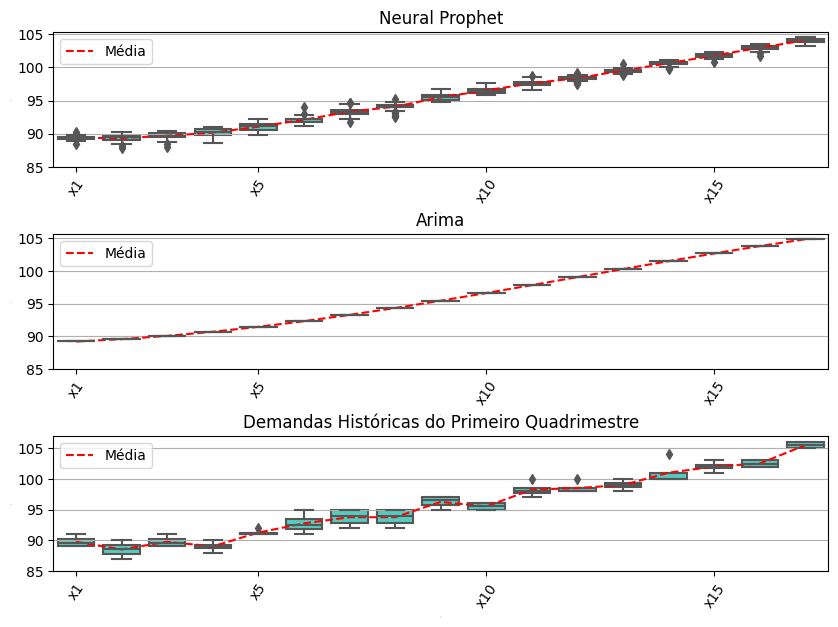

In [105]:
fig=plt.figure(figsize=(10,7))
#fig.suptitle('Distribuição das Previsões de Demandas por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_previsao_np,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.grid(axis='y')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])
plt.yticks([85,90,95,100,105])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Arima')
sns.boxplot(data=boxPlot_previsao_ar,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_ar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.grid(axis='y')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_ar.columns)/5)+1)])
plt.yticks([85,90,95,100,105])
plt.legend()

ax=fig.add_subplot(3,1,3)
ax.set_title('Demandas Históricas do Primeiro Quadrimestre')
sns.boxplot(data=boxPlot_demandas,x='x',y='demandas',color='turquoise')
plt.plot(demandas_d.columns,demandas_d.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.grid(axis='y')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(demandas_d.columns)/5)+1)])
plt.yticks([85,90,95,100,105])
plt.legend()

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Previsoes.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [88]:
previsao_demanda_ar.describe()

,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16,demandas17
count,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,6.000000e+01
mean,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02
std,4.299234e-14,1.433078e-14,0.000000,1.433078e-14,0.000000,2.866156e-14,2.866156e-14,1.433078e-14,1.433078e-14,4.299234e-14,0.000000,0.000000,0.000000,0.000000,2.866156e-14,0.000000,1.433078e-14
min,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02
25%,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02
50%,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02
75%,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02
max,8.918506e+01,8.954486e+01,90.044058,9.067537e+01,91.429605,9.229577e+01,9.326124e+01,9.431196e+01,9.543261e+01,9.660686e+01,97.817611,99.047216,100.277761,101.491317,1.026702e+02,103.797236,1.048560e+02


In [89]:
demandas_d.describe()

,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16,demandas17
count,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.00,4.00,4.000000,4.00000,4.000000,4.0,4.000000,4.0,4.000000,4.00000,4.00000
mean,89.750000,88.500000,89.750000,89.000000,91.25,92.750000,93.75,93.75,96.250000,95.50000,98.250000,98.5,99.000000,101.0,102.000000,102.50000,105.50000
std,0.957427,1.290994,0.957427,0.816497,0.50,1.707825,1.50,1.50,0.957427,0.57735,1.258306,1.0,0.816497,2.0,0.816497,0.57735,0.57735
min,89.000000,87.000000,89.000000,88.000000,91.00,91.000000,92.00,92.00,95.000000,95.00000,97.000000,98.0,98.000000,100.0,101.000000,102.00000,105.00000
25%,89.000000,87.750000,89.000000,88.750000,91.00,91.750000,92.75,92.75,95.750000,95.00000,97.750000,98.0,98.750000,100.0,101.750000,102.00000,105.00000
50%,89.500000,88.500000,89.500000,89.000000,91.00,92.500000,94.00,94.00,96.500000,95.50000,98.000000,98.0,99.000000,100.0,102.000000,102.50000,105.50000
75%,90.250000,89.250000,90.250000,89.250000,91.25,93.500000,95.00,95.00,97.000000,96.00000,98.500000,98.5,99.250000,101.0,102.250000,103.00000,106.00000
max,91.000000,90.000000,91.000000,90.000000,92.00,95.000000,95.00,95.00,97.000000,96.00000,100.000000,100.0,100.000000,104.0,103.000000,103.00000,106.00000


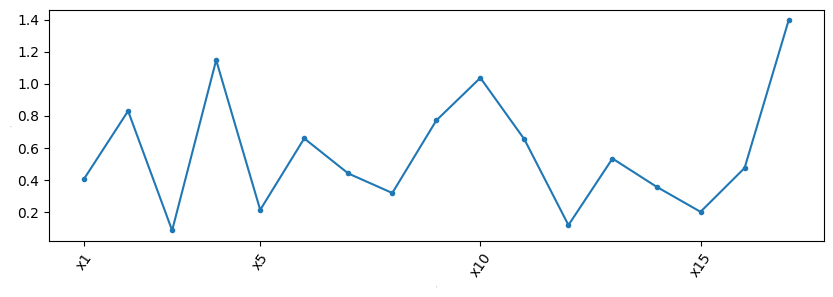

In [90]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot([f'x{i}' for i in range(1,18)], #x
         abs(demandas_d.describe().iloc[1,:]-previsao_demanda_np.describe().iloc[1,:]),  #y
         marker='.')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Previsoes.png', format='png', bbox_inches='tight',pad_inches = 0.1)

([<matplotlib.axis.XTick at 0x1d88e0a8b20>,
 [Text(0, 0, 'x1'), Text(4, 0, 'x5'), Text(9, 0, 'x10'), Text(14, 0, 'x15')])

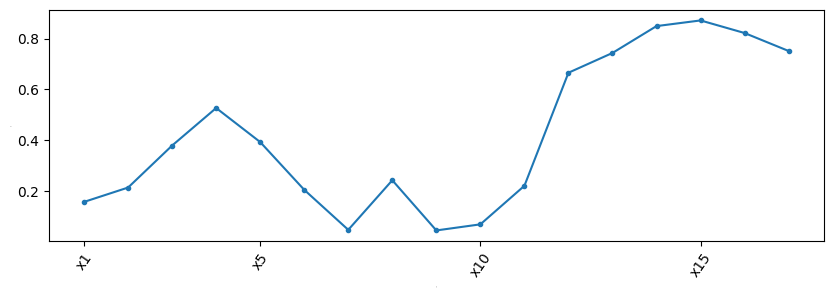

In [91]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot([f'x{i}' for i in range(1,18)], #x
         abs(previsao_demanda_ar.describe().iloc[1,:]-previsao_demanda_np.describe().iloc[1,:]),  #y
         marker='.')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])